In [44]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

In [45]:
if not firebase_admin._apps:
  cred = credentials.Certificate('bake-off-auth.json')
  firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://fixe-bake-off-2-ipm-default-rtdb.europe-west1.firebasedatabase.app/'
  })

In [46]:
ref = db.reference('/G3')

In [47]:
data = ref.get()

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="ticks", context="talk")
plt.style.use(["dark_background", {'axes.facecolor': "#151515", 'figure.facecolor': '#151515'}])
sns.set_palette(["#118ab2", "#2a9d8f", "#e9c46a"])
pd.set_option('display.max_rows', 300)

In [49]:
df = pd.DataFrame(data)

In [50]:
df

,-Mzocwm2oTs53hm2hGmV,-Mzod5rcytNc1Gl9_OwI,-MzoeL1XgVySit5VEneS,-MzpCJl_8j_FOVW7cVkd,-MzpFrWYw0G-z3SQdmhT,-MzpKVf5Nx2UJzFIf5J6,-MzpKm6JNpqZftOKJ0SO,-MzpLS2kwuTOyAxUi6MP,-MzpLSgBPS_O0CLLf2K4,-MzpL_fCYbnWaklczIUW,...,-N-FStZi49Vrd2LNLX6m,-N-FT15bXJZJ_HG62Xne,-N-FT8EEiawpEKwuSpqC,-N-IB1hiccjg2p6aQ_qC,-N-IBBWmJYggmEiUhcy7,-N-ISe7YQNGoWVJb2LcE,-N-Iszt5eskWsEqzsnAk,-N-It7cM6ILChkY48h-1,-N-JXJtS6gFJ7hLywPhM,-N-J_YjHiPMFOdcfkntx
accuracy,87.037037,75.925926,75.925926,96.296296,92.592593,94.444444,94.444444,92.592593,92.592593,98.148148,...,90.740741,98.148148,96.296296,96.296296,96.296296,98.148148,96.296296,92.592593,96.296296,98.148148
active_features,{'particles': True},{'particles': True},"{'current_target_border': True, 'particles': F...","{'animate_navigation_line': False, 'border_on_...","{'animate_navigation_line': True, 'border_on_h...","{'animate_navigation_line': True, 'background_...","{'animate_navigation_line': False, 'background...","{'animate_navigation_line': True, 'background_...","{'animate_navigation_line': True, 'background_...","{'animate_navigation_line': False, 'background...",...,"{'animate_navigation_line': True, 'background_...","{'animate_navigation_line': True, 'background_...","{'animate_navigation_line': True, 'background_...","{'animate_navigation_line': True, 'background_...","{'animate_navigation_line': True, 'background_...","{'animate_navigation_line': True, 'background_...","{'animate_navigation_line': True, 'background_...","{'animate_navigation_line': True, 'background_...","{'animate_navigation_line': True, 'background_...","{'animate_navigation_line': True, 'background_..."
assessed_by,99207,99207,99207,99209,99211,99341,99209,199290,199290,99209,...,99245,99245,99245,99180,99180,99281,55555,55555,99341,99245
attempt,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0
attempt_duration,27.633,29.0499,29.066,25.9376,33.7788,34.876,23.8436,41.7464,44.3644,25.9659,...,25.9919,28.9359,27.0266,34.5281,36.3231,42.274,36.2258,31.6401,30.3613,28.2775
hits,47,41,41,52,50,51,51,50,50,53,...,49,53,52,52,52,53,52,50,52,53
misses,7,13,13,2,4,3,3,4,4,1,...,5,1,2,2,2,1,2,4,2,1
project_from,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
target_w_penalty,2.104,4.352,4.353,0.480,1.107,0.756,0.552,1.254,1.303,0.480,...,1.333,0.535,0.500,0.639,0.672,0.782,0.670,1.067,0.562,0.523
test_completed_by,4/4/2022 13:54:9,4/4/2022 13:54:51,4/4/2022 14:0:15,4/4/2022 16:33:5,4/4/2022 16:48:34,4/4/2022 17:8:51,4/4/2022 17:10:2,4/4/2022 17:12:58,4/4/2022 17:13:1,4/4/2022 17:13:33,...,9/4/2022 23:35:15,9/4/2022 23:35:50,9/4/2022 23:36:19,10/4/2022 12:16:5,10/4/2022 12:16:44,10/4/2022 13:33:3,10/4/2022 15:32:30,10/4/2022 15:33:6,10/4/2022 18:33:4,10/4/2022 18:47:11


In [51]:
# transpose the dataframe
df = df.T

In [52]:
# change the row names to NEW integer indexes
df.index = range(len(df))

Text(0.5, 1.0, 'Attempt Duration Histogram (with every attempt included)')

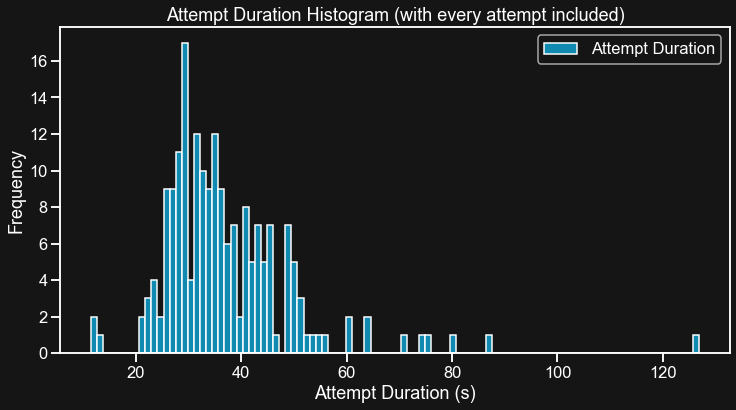

In [53]:
# plot the df_t's attempt_duration column
plt.figure(figsize=(12, 6))
df['attempt_duration'].plot(kind='hist', bins=100, color='#118ab2')
plt.xlabel('Attempt Duration (s)')
plt.legend(['Attempt Duration'])
plt.title('Attempt Duration Histogram (with every attempt included)')

In [54]:
# remove the outliers: attempts where the duration lasted more than 50s
df = df[df['attempt_duration'] < 50]
# remove more outliers: attempts where the misses amount was weird
df = df[df['misses'] < df['hits'].median() -  2 * df['misses'].std()]

Text(0.5, 1.0, 'Attempt Duration Histogram (with outliers removed)')

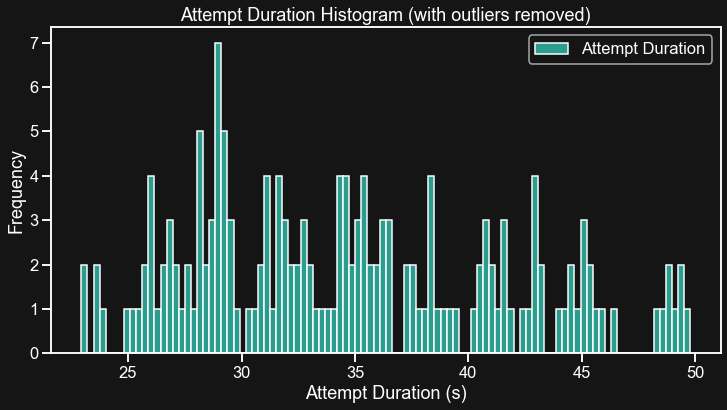

In [55]:
# plot it again
plt.figure(figsize=(12, 6))
df['attempt_duration'].plot(kind='hist', bins=100, color='#2a9d8f')
plt.xlabel('Attempt Duration (s)')
plt.legend(['Attempt Duration'])
plt.title('Attempt Duration Histogram (with outliers removed)')
